# Homework 

Any mass can lead to a gravitational potential in 3-D (x-y-z) space
\begin{equation}
\nabla^2\Phi=4\pi G\rho
\end{equation}
    

We will set G=1 for this problem.  
Please solve the potential of a line mass 
(i.e. one zone at x=50, y=50 with nonzero density and all others with zero density) using Gauss-Siedel method. Since the problem has symmetry in the Z direction:
\begin{equation}
\nabla^2\Phi=\frac{\partial^2\Phi}{\partial^2 x}+\frac{\partial^2\Phi}{\partial^2y}
\end{equation}


The domain is X from 0 to 100, Y from 0 to 100. $\Delta$x= $\Delta$y=1. (assume $\Phi=0$
at the boundary and $\rho_{50,50}$ is always 1)

Please verify that the potential has radial dependence close to 2*G*$\mu$*ln(r)+constant. 
Where $\mu$ is its mass per unit length and r is the distance to the line mass. 



In [1]:
import matplotlib.pylab as plb
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
Nmax = 100
Niter = 10001
V = np.zeros((Nmax, Nmax), float)   
W = np.zeros((Nmax, Nmax, Niter), float)

V[50,50] = 4*np.pi             # Line at 100V

for i in range(Niter):
    maxerr=0.
    for j in range(1, Nmax-1):                                                
        for k in range(1,Nmax-1): 
            # Implements the Gauss-Seidel method
            du = 0.25*(V[j+1,k] + V[j-1,k] + V[j,k+1] + V[j,k-1]) - V[j,k]
            V[j,k]= V[j,k] + du
            
            # Keep track of maximum error
            if(maxerr<abs(du)):
                maxerr=abs(du)
    
    # Force the boundary condition of rho_{50,50} = 1
    V[50,50] = 4*np.pi
    
    # Save the current state
    W[:,:,i] = V[:,:]
    
    if i%1000 == 0:
        print(i, maxerr)
    if(maxerr<1.e-3):
        break

print(maxerr)

0 10.995574287564276
1000 5.836137146529024
2000 5.605682606242269
3000 5.538054318612099
4000 5.51801330683092
5000 5.512073532610538
6000 5.510313093318944
7000 5.509791331638093
8000 5.509636691115695
9000 5.509590858521915
10000 5.509577274587898
5.509577274587898


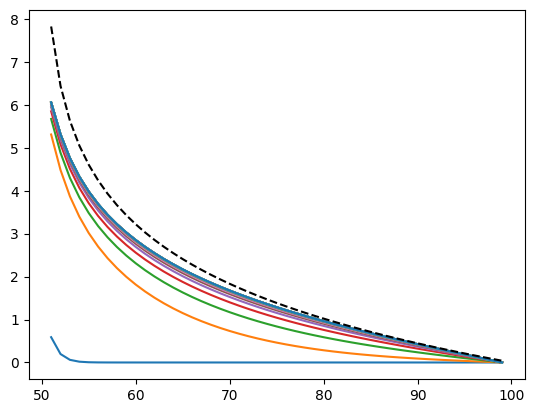

In [3]:
# PLotting
X = np.arange(51, Nmax, 1)
for i in range(0, Niter, 500):
    plb.plot(X, W[50,51:,i])

plb.plot(X, -2*np.log((X-50)) + 2*np.log(50), "--", color='black')

We can see that as we allow iterations to go on, we get close to a function proportional to ln(r). However, the approximation is only so good at a distance from the line of mass. Because we are dealing with a potential that has a singularity (r = 0), convergence will take longer and longer as we approach that singularity. Approximating at the singularity itself would take infinite time, as at each iteration we only take a finite step.